In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#plastik

1/1 [==============================] - 1s 1s/step
Hasil Pindaian 	: Ini adalah Botol Plastik.
Deskripsi 	: Botol plastik merupakan salah satu jenis sampah yang sangat umum ditemui dalam kehidupan sehari-hari.
        	Botol plastik umumnya terbuat dari polietilen tereftalat (PET), yang merupakan jenis plastik yang dapat didaur ulang.
        	Daur ulang botol plastik memiliki manfaat besar bagi lingkungan karena mengurangi penggunaan bahan baku baru, 
        	mengurangi limbah plastik yang mencemari lingkungan, dan menghemat energi yang diperlukan dalam produksi plastik baru. 
        	Oleh karena itu, penting bagi kita semua untuk mempraktikkan daur ulang botol plastik dengan membuangnya ke tempat yang benar 
        	dan mendukung program daur ulang yang ada di lingkungan kita.

Berikut merupakan barang daur ulang dari bahan Botol Plastik.


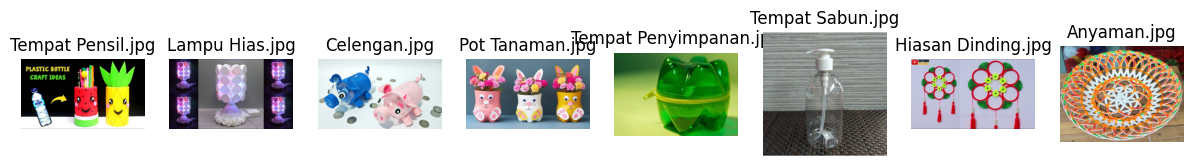

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

# Load model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Coba/model_plastik.h5')

# Fungsi untuk mengklasifikasikan gambar dan memberikan rekomendasi
def classify_image(image_path):
    # Load dan preprocess gambar
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = image_array / 255.0  # Normalisasi

    # Klasifikasikan gambar menggunakan model
    predictions = loaded_model.predict(image_array)
    predicted_class = tf.argmax(predictions[0])

    # Jawaban dan deskripsi berdasarkan klasifikasi
    answer = ""
    folder_path = ""
    if predicted_class == 0:
        answer = "Botol Plastik."
        description = '''Botol plastik merupakan salah satu jenis sampah yang sangat umum ditemui dalam kehidupan sehari-hari.
        \tBotol plastik umumnya terbuat dari polietilen tereftalat (PET), yang merupakan jenis plastik yang dapat didaur ulang.
        \tDaur ulang botol plastik memiliki manfaat besar bagi lingkungan karena mengurangi penggunaan bahan baku baru,
        \tmengurangi limbah plastik yang mencemari lingkungan, dan menghemat energi yang diperlukan dalam produksi plastik baru.
        \tOleh karena itu, penting bagi kita semua untuk mempraktikkan daur ulang botol plastik dengan membuangnya ke tempat yang benar
        \tdan mendukung program daur ulang yang ada di lingkungan kita.\n'''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Plastik/Botol'  # Path folder tempat gambar botol disimpan
    elif predicted_class == 1:
        answer = "Kemasan Plastik."
        description = '''Sampah kemasan plastik merupakan jenis sampah yang terkait dengan penggunaan berbagai macam kemasan plastik dalam kehidupan sehari-hari.
        \tKemasan plastik umumnya digunakan untuk mengemas makanan, minuman, produk rumah tangga, produk kecantikan, dan berbagai produk lainnya.
        \tSampah kemasan plastik dapat berdampak negatif terhadap lingkungan dan ekosistem. Jika tidak dikelola dengan baik, kemasan plastik bisa mencemari lautan,
        \tsungai, dan lahan. Plastik yang terbuang sembarangan dapat merusak habitat alami dan menyebabkan keracunan pada hewan laut yang memakan atau terperangkap olehnya.
        \tSelain itu, pembakaran atau pembuangan plastik yang tidak tepat juga dapat menghasilkan polusi udara dan tanah yang berbahaya.\n
        \tUpaya kolektif dari individu, pemerintah, dan industri dalam mengurangi penggunaan kemasan plastik sekali pakai, meningkatkan daur ulang,
        \tserta meningkatkan inovasi dalam pengemasan yang ramah lingkungan dapat membantu mengurangi masalah sampah kemasan plastik dan menjaga keberlanjutan lingkungan kita.\n'''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Plastik/Kemasan'  # Path folder tempat gambar kemasan disimpan
    elif predicted_class == 2:
        answer = "Sedotan."
        description = '''Sampah sedotan plastik adalah jenis sampah yang terdiri dari sedotan atau pipet kecil yang terbuat dari plastik.
        \tSedotan plastik umumnya digunakan untuk minuman seperti jus, soda, atau minuman ringan lainnya.\n
        \tMeskipun sedotan plastik terlihat kecil dan tidak signifikan, mereka dapat menjadi masalah lingkungan yang serius.
        \tIni karena sedotan plastik sulit terurai dan cenderung berakhir sebagai sampah plastik yang mencemari lautan dan ekosistem.\n
        \tDengan kesadaran dan tindakan kolektif, penggunaan dan pembuangan sedotan plastik sekali pakai dapat dikurangi secara signifikan.
        \tMenggantinya dengan alternatif yang lebih berkelanjutan dan mengelola sampah sedotan plastik dengan benar adalah langkah penting
        \tdalam menjaga keberlanjutan lingkungan kita.\n'''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Plastik/Sedotan'  # Path folder tempat gambar sedotan disimpan
    elif predicted_class == 3:
        answer = "Sendok."
        description = '''Sampah sendok plastik adalah jenis sampah yang terdiri dari sendok kecil yang terbuat dari plastik.
        \tSendok plastik sering digunakan dalam berbagai acara atau makanan makanan siap saji yang dikonsumsi di luar rumah.\n
        \tSampah sendok plastik memiliki dampak negatif pada ekosistem laut dan lingkungan secara keseluruhan. Satwa laut dapat tersangkut
        \tatau memakan sendok plastik, yang dapat menyebabkan luka atau kematian. Selain itu, pembuangan sendok plastik yang tidak tepat juga
        \tdapat menyebabkan pencemaran tanah dan air.\n
        \tDengan mengadopsi alternatif yang lebih ramah lingkungan dan mengelola sendok plastik dengan benar, kita dapat mengurangi dampak negatifnya
        \tterhadap lingkungan dan menjaga keberlanjutan sumber daya alam kita.\n'''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Plastik/Sendok'  # Path folder tempat gambar sendok disimpan

    return answer, description, folder_path
# Klasifikasikan gambar, berikan deskripsi dan rekomendasi
image_path = '/content/botol3.jpg'
answer, description, folder_path = classify_image(image_path)
print(f"Hasil Pindaian \t: Ini adalah {answer}")
print(f"Deskripsi \t: {description}")
print(f"Berikut merupakan barang daur ulang dari bahan {answer}")

# Tampilkan gambar yang sesuai dengan klasifikasi
if folder_path:
    file_list = os.listdir(folder_path)
    if len(file_list) > 0:
        num_images = len(file_list)
        fig = plt.figure(figsize=(15, 15))  # Atur ukuran figure berdasarkan jumlah gambar
        for i, file in enumerate(file_list):
            img_path = os.path.join(folder_path, file)
            img = mpimg.imread(img_path)
            ax = fig.add_subplot(1, num_images, i + 1)
            ax.imshow(img)
            ax.set_title(file)
            ax.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang sesuai dengan klasifikasi.")
else:
    print("Tidak ada folder yang sesuai dengan klasifikasi.")


#Glass

1/1 [==============================] - 1s 798ms/step
Hasil Pindaian 	: Ini adalah Kaca.
Deskripsi 	: Sampah potongan kaca adalah jenis sampah yang terdiri dari pecahan atau potongan-potongan kaca yang tidak utuh. 
        	Sampah ini bisa berasal dari pecahan botol kaca, jendela kaca, peralatan kaca, atau benda-benda kaca lainnya yang pecah atau rusak.

        	Selain itu, sampah potongan kaca juga memiliki dampak negatif pada lingkungan jika dibuang secara sembarangan. Pecahan kaca yang terbuang 
        	di alam bebas dapat mencemari tanah, air, dan ekosistem. Satwa liar juga dapat terluka atau terperangkap oleh pecahan kaca yang terbuang secara tidak benar.

        	Dengan penanganan yang hati-hati dan pengelolaan sampah yang tepat, kita dapat mengurangi risiko cedera dan dampak negatif sampah potongan kaca terhadap lingkungan.
 
Berikut merupakan barang daur ulang dari bahan Kaca.


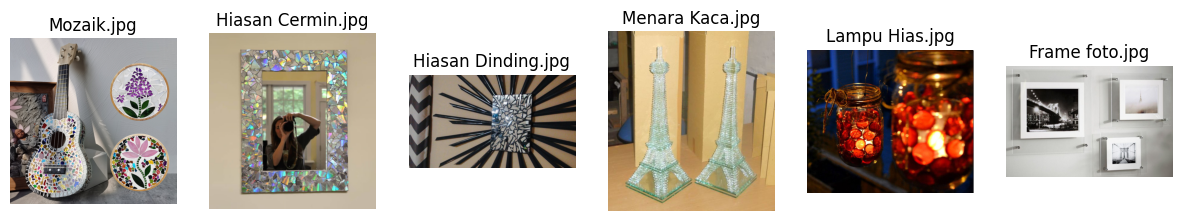

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

# Load model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Coba/model_glass.h5')

# Fungsi untuk mengklasifikasikan gambar dan memberikan rekomendasi
def classify_image(image_path):
    # Load dan preprocess gambar
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = image_array / 255.0  # Normalisasi

    # Klasifikasikan gambar menggunakan model
    predictions = loaded_model.predict(image_array)
    predicted_class = tf.argmax(predictions[0])

    # Jawaban dan deskripsi berdasarkan klasifikasi
    answer = ""
    folder_path = ""
    if predicted_class == 0:
        answer = "Botol Kaca."
        description = '''Sampah botol kaca adalah jenis sampah yang terdiri dari botol yang terbuat dari bahan kaca.
        \tBotol kaca digunakan dalam berbagai industri, seperti industri minuman, kosmetik, dan farmasi. Botol kaca memiliki
        \tkeunggulan karena dapat digunakan berulang kali dan memiliki sifat yang tahan terhadap pengaruh panas dan zat kimia.\n
        \tNamun, sampah botol kaca juga dapat menjadi masalah lingkungan jika tidak dikelola dengan baik. Botol kaca yang tidak didaur ulang
        \tatau dibuang ke tempat sampah yang tepat dapat memakan waktu lama untuk terurai di alam bebas. Selain itu, pecahan botol kaca yang tidak
        \tditangani dengan hati-hati dapat menjadi bahaya bagi manusia dan hewan.\n
        \tDengan mengadopsi praktik daur ulang yang baik dan pengelolaan sampah yang bertanggung jawab, kita dapat mengurangi dampak negatif
        \tsampah botol kaca terhadap lingkungan dan memanfaatkan kembali sumber daya kaca yang berharga.\n'''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Glass/Botol Kaca'  # Path folder tempat gambar botol kaca disimpan
    elif predicted_class == 1:
        answer = "Kaca."
        description = '''Sampah potongan kaca adalah jenis sampah yang terdiri dari pecahan atau potongan-potongan kaca yang tidak utuh.
        \tSampah ini bisa berasal dari pecahan botol kaca, jendela kaca, peralatan kaca, atau benda-benda kaca lainnya yang pecah atau rusak.\n
        \tSelain itu, sampah potongan kaca juga memiliki dampak negatif pada lingkungan jika dibuang secara sembarangan. Pecahan kaca yang terbuang
        \tdi alam bebas dapat mencemari tanah, air, dan ekosistem. Satwa liar juga dapat terluka atau terperangkap oleh pecahan kaca yang terbuang secara tidak benar.\n
        \tDengan penanganan yang hati-hati dan pengelolaan sampah yang tepat, kita dapat mengurangi risiko cedera dan dampak negatif sampah potongan kaca terhadap lingkungan.\n '''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Glass/Kaca'  # Path folder tempat gambar kaca disimpan

    return answer, description, folder_path
# Klasifikasikan gambar, berikan deskripsi dan rekomendasi
image_path = '/content/kaca.jpg'
answer, description, folder_path = classify_image(image_path)
print(f"Hasil Pindaian \t: Ini adalah {answer}")
print(f"Deskripsi \t: {description}")
print(f"Berikut merupakan barang daur ulang dari bahan {answer}")

# Tampilkan gambar yang sesuai dengan klasifikasi
if folder_path:
    file_list = os.listdir(folder_path)
    if len(file_list) > 0:
        num_images = len(file_list)
        fig = plt.figure(figsize=(15, 15))  # Atur ukuran figure berdasarkan jumlah gambar
        for i, file in enumerate(file_list):
            img_path = os.path.join(folder_path, file)
            img = mpimg.imread(img_path)
            ax = fig.add_subplot(1, num_images, i + 1)
            ax.imshow(img)
            ax.set_title(file)
            ax.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang sesuai dengan klasifikasi.")
else:
    print("Tidak ada folder yang sesuai dengan klasifikasi.")


#Metal

1/1 [==============================] - 1s 958ms/step
Hasil Pindaian 	: Ini adalah Kaleng.
Deskripsi 	: Sampah kaleng adalah jenis sampah yang terdiri dari kaleng logam yang digunakan untuk mengemas minuman, makanan, atau produk-produk lainnya. 
        	Kaleng umumnya terbuat dari aluminium atau besi yang dilapisi dengan lapisan pelindung untuk mencegah korosi.

        	Sampah kaleng dapat mencakup kaleng minuman seperti minuman ringan, bir, atau kaleng makanan seperti kaleng sarden, kacang, atau makanan kaleng lainnya. 
        	Kaleng memiliki keunggulan sebagai kemasan karena ringan, mudah diolah, dan dapat memperpanjang umur simpan produk.

        	Penting untuk mencermati pengelolaan sampah kaleng, karena mereka memiliki potensi untuk didaur ulang dengan sangat efisien. 
        	Kaleng logam merupakan salah satu jenis bahan yang paling umum didaur ulang di seluruh dunia. Proses daur ulang kaleng melibatkan pengumpulan, pemilahan, 
        	pemrosesan, dan pengecoran ulang menja

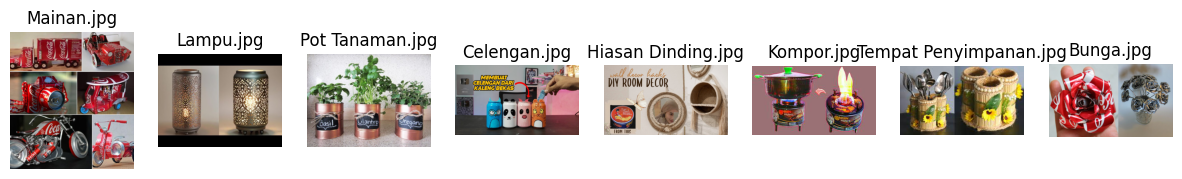

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

# Load model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Coba/model_metal.h5')

# Fungsi untuk mengklasifikasikan gambar dan memberikan rekomendasi
def classify_image(image_path):
    # Load dan preprocess gambar
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = image_array / 255.0  # Normalisasi

    # Klasifikasikan gambar menggunakan model
    predictions = loaded_model.predict(image_array)
    predicted_class = tf.argmax(predictions[0])

    # Jawaban dan deskripsi berdasarkan klasifikasi
    answer = ""
    folder_path = ""
    if predicted_class == 0:
        answer = "Aluminium Foil."
        description = '''Sampah aluminium foil adalah jenis sampah yang terdiri dari lembaran aluminium tipis yang digunakan
        \tuntuk membungkus atau melindungi makanan, mengemas produk, atau digunakan dalam berbagai keperluan lainnya. Aluminium foil
        \tmemiliki sifat yang fleksibel, ringan, dan tahan terhadap panas.\n
        \tSampah aluminium foil dapat terbentuk saat aluminium foil digunakan sekali pakai dan kemudian dibuang. Aluminium foil yang terbuang
        \tsecara tidak tepat dapat mencemari lingkungan jika tidak dikelola dengan baik.\n
        \tNamun, aluminium foil juga memiliki potensi untuk didaur ulang. Aluminium merupakan salah satu jenis logam yang bisa didaur ulang dengan baik dan efisien.
        \tMelalui proses daur ulang, aluminium foil yang terbuang dapat dikumpulkan, dipilah, dan diproses untuk digunakan kembali dalam pembuatan produk aluminium baru.\n
        \tPenting untuk membuang sampah aluminium foil ke tempat sampah daur ulang atau fasilitas daur ulang yang tersedia di komunitas.
        \tMengedukasi diri sendiri dan masyarakat tentang pentingnya daur ulang aluminium foil dan mengelola sampah dengan benar adalah langkah penting dalam menjaga
        \tkeberlanjutan lingkungan dan mengurangi pemborosan sumber daya.\n '''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Metal/Aluminium Foil'  # Path folder tempat gambar aluminium disimpan
    elif predicted_class == 1:
        answer = "Kaleng."
        description = '''Sampah kaleng adalah jenis sampah yang terdiri dari kaleng logam yang digunakan untuk mengemas minuman, makanan, atau produk-produk lainnya.
        \tKaleng umumnya terbuat dari aluminium atau besi yang dilapisi dengan lapisan pelindung untuk mencegah korosi.\n
        \tSampah kaleng dapat mencakup kaleng minuman seperti minuman ringan, bir, atau kaleng makanan seperti kaleng sarden, kacang, atau makanan kaleng lainnya.
        \tKaleng memiliki keunggulan sebagai kemasan karena ringan, mudah diolah, dan dapat memperpanjang umur simpan produk.\n
        \tPenting untuk mencermati pengelolaan sampah kaleng, karena mereka memiliki potensi untuk didaur ulang dengan sangat efisien.
        \tKaleng logam merupakan salah satu jenis bahan yang paling umum didaur ulang di seluruh dunia. Proses daur ulang kaleng melibatkan pengumpulan, pemilahan,
        \tpemrosesan, dan pengecoran ulang menjadi produk logam baru.\n
        \tDengan mendaur ulang sampah kaleng, kita dapat mengurangi kebutuhan akan bahan mentah baru dan mengurangi dampak lingkungan yang terkait dengan produksi logam baru.
        \tSelain itu, daur ulang kaleng juga membantu mengurangi limbah yang masuk ke tempat pembuangan akhir.\n
        \tPenting untuk memisahkan sampah kaleng dari sampah lainnya dan membuangnya di tempat sampah daur ulang yang disediakan oleh pemerintah atau fasilitas daur ulang di komunitas.
        \tDengan memastikan bahwa sampah kaleng terdaur ulang dengan benar, kita dapat membantu menjaga keberlanjutan lingkungan dan mengurangi pemakaian sumber daya alam yang berharga.\n '''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Metal/Kaleng'  # Path folder tempat gambar kaleng disimpan

    return answer, description, folder_path
# Klasifikasikan gambar, berikandeskripsi dan rekomendasi
image_path = '/content/kaleng.jpeg'
answer, description, folder_path = classify_image(image_path)
print(f"Hasil Pindaian \t: Ini adalah {answer}")
print(f"Deskripsi \t: {description}")
print(f"Berikut merupakan barang daur ulang dari bahan {answer}")

# Tampilkan gambar yang sesuai dengan klasifikasi
if folder_path:
    file_list = os.listdir(folder_path)
    if len(file_list) > 0:
        num_images = len(file_list)
        fig = plt.figure(figsize=(15, 15))  # Atur ukuran figure berdasarkan jumlah gambar
        for i, file in enumerate(file_list):
            img_path = os.path.join(folder_path, file)
            img = mpimg.imread(img_path)
            ax = fig.add_subplot(1, num_images, i + 1)
            ax.imshow(img)
            ax.set_title(file)
            ax.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang sesuai dengan klasifikasi.")
else:
    print("Tidak ada folder yang sesuai dengan klasifikasi.")


#Kain


1/1 [==============================] - 1s 515ms/step
Hasil Pindaian 	: Ini adalah Kain.
Deskripsi 	: Sampah kain adalah jenis sampah yang terdiri dari potongan-potongan atau sisa-sisa kain yang tidak lagi digunakan atau rusak.
        	Sampah kain dapat berasal dari pakaian bekas yang tidak terpakai, kain sisa dari proses produksi, atau barang-barang tekstil yang rusak.

        	Kain merupakan bahan yang umum digunakan dalam berbagai produk seperti pakaian, kain penutup, furnitur, dan lain sebagainya.
        	Namun, ketika kain tidak lagi digunakan atau rusak, mereka dapat menjadi sumber limbah yang signifikan.

        	Penting untuk membuang sampah kain dengan benar, baik dengan mendaur ulang atau membuangnya ke tempat sampah yang sesuai.
        	Mengurangi pemborosan kain dan memperpanjang siklus hidup kain dapat membantu mengurangi dampak negatif pada lingkungan dan mengurangi
        	penggunaan sumber daya alam yang berharga.

Berikut merupakan barang daur ulang dari bahan Kai

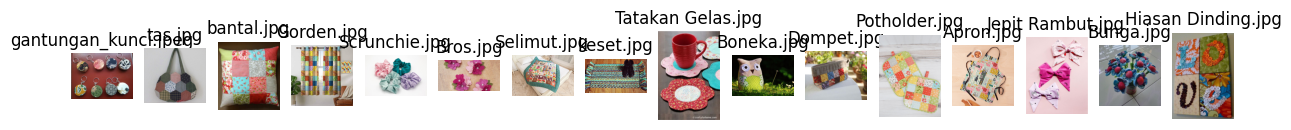

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

# Load model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Coba/model_kain.h5')

# Fungsi untuk mengklasifikasikan gambar dan memberikan rekomendasi
def classify_image(image_path):
    # Load dan preprocess gambar
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = image_array / 255.0  # Normalisasi

    # Klasifikasikan gambar menggunakan model
    predictions = loaded_model.predict(image_array)
    predicted_class = tf.argmax(predictions[0])

    # Jawaban dan deskripsi berdasarkan klasifikasi
    answer = ""
    folder_path = ""
    if predicted_class == 0:
        answer = "Kain."
        description = '''Sampah kain adalah jenis sampah yang terdiri dari potongan-potongan atau sisa-sisa kain yang tidak lagi digunakan atau rusak.
        \tSampah kain dapat berasal dari pakaian bekas yang tidak terpakai, kain sisa dari proses produksi, atau barang-barang tekstil yang rusak.\n
        \tKain merupakan bahan yang umum digunakan dalam berbagai produk seperti pakaian, kain penutup, furnitur, dan lain sebagainya.
        \tNamun, ketika kain tidak lagi digunakan atau rusak, mereka dapat menjadi sumber limbah yang signifikan.\n
        \tPenting untuk membuang sampah kain dengan benar, baik dengan mendaur ulang atau membuangnya ke tempat sampah yang sesuai.
        \tMengurangi pemborosan kain dan memperpanjang siklus hidup kain dapat membantu mengurangi dampak negatif pada lingkungan dan mengurangi
        \tpenggunaan sumber daya alam yang berharga.\n'''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Kain'  # Path folder tempat gambar aluminium disimpan
    elif predicted_class == 1:
        answer = "Organik."
        description = '''Sampah organik adalah jenis sampah yang terdiri dari bahan-bahan yang berasal dari sisa-sisa organisme hidup, seperti sisa makanan,
        \tdaun, ranting, kulit buah, sayuran yang busuk, atau limbah pertanian. Sampah organik terutama terdiri dari bahan-bahan yang dapat terdekomposisi
        \tsecara alami oleh mikroorganisme/\n
        \tSampah organik memiliki sifat yang mudah membusuk dan dapat menghasilkan gas metana saat terurai dalam kondisi anaerobik (tanpa oksigen).
        \tJumlah sampah organik yang terbuang secara tidak tepat ke tempat pembuangan akhir dapat menyebabkan peningkatan emisi gas rumah kaca dan
        \tmenciptakan masalah lingkungan.\n
        \tNamun, sampah organik juga memiliki potensi untuk didaur ulang melalui proses pengomposan. Pengomposan adalah proses alami di mana sampah organik
        \tterurai oleh mikroorganisme menjadi bahan yang berguna yang disebut kompos. Kompos ini dapat digunakan sebagai pupuk alami untuk meningkatkan
        \tkesuburan tanah di kebun atau taman.\n
        \tPengelolaan yang tepat terhadap sampah organik dapat membantu mengurangi jumlah sampah yang dikirim ke tempat pembuangan akhir, mengurangi emisi
        \tgas rumah kaca, dan menghasilkan sumber daya yang bernilai dari bahan organik yang terdekomposisi.\n'''
        folder_path = '/content/drive/MyDrive/Coba/Recomendation/Kain/Organik'  # Path folder tempat gambar kaleng disimpan

    return answer, description, folder_path
# Klasifikasikan gambar, berikandeskripsi dan rekomendasi
image_path = '/content/kain1.jpg'
answer, description, folder_path = classify_image(image_path)
print(f"Hasil Pindaian \t: Ini adalah {answer}")
print(f"Deskripsi \t: {description}")
print(f"Berikut merupakan barang daur ulang dari bahan {answer}")

# Tampilkan gambar yang sesuai dengan klasifikasi
if folder_path:
    file_list = os.listdir(folder_path)
    if len(file_list) > 0:
        num_images = len(file_list)
        fig = plt.figure(figsize=(15, 15))  # Atur ukuran figure berdasarkan jumlah gambar
        for i, file in enumerate(file_list):
            img_path = os.path.join(folder_path, file)
            img = mpimg.imread(img_path)
            ax = fig.add_subplot(1, num_images, i + 1)
            ax.imshow(img)
            ax.set_title(file)
            ax.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang sesuai dengan klasifikasi.")
else:
    print("Tidak ada folder yang sesuai dengan klasifikasi.")
